In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode()
import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
with open("A00051826_vis_learn Events.txt") as eyetracking:
        lines = [line.split() for line in eyetracking]

In [101]:
print len(lines)

5391


## Separates Data Into Labels, UserEvents, and Blinks+Fixations+Saccades 

In [19]:
uec = 0
bsfc = 0 
for i in range(len(lines)):
    if (lines[i] <> []):
        if len(lines[i]) == 4 and (lines[i][3]) == "Fixations:":
            FLabels = lines[i+1]
        if len(lines[i]) == 4 and (lines[i][3]) == "Saccades:":
            SLabels = lines[i+1]
        if len(lines[i]) == 4 and (lines[i][3]) == "Blinks:":
            BLabels = lines[i+1]
        if (lines[i][0]) == "UserEvent":
            if uec == 1:
                uec += 1
                UE = lines[i]
                uel = len(lines[i])
            if uec == 0:
                uel = 0
                uec += 1
            if uel == len(lines[i]) and (lines[i][2] <> '2'):
                UE = np.vstack((UE, lines[i]))
        if (lines[i][0] == "Saccade" or lines[i][0] == "Fixation" or lines[i][0] == "Blink") and (bsfc == 0):
            bsfc = bsfc+1
            BSF = lines[i:]
print len(BSF)

5249
[['UserEvent' '1' '2' '4115526602' '#' 'Message:' 'start_eye_recording']
 ['UserEvent' '1' '3' '4127535600' '#' 'Message:' '20']
 ['UserEvent' '1' '4' '4147532205' '#' 'Message:' '30']
 ['UserEvent' '1' '5' '4187530330' '#' 'Message:' '20']
 ['UserEvent' '1' '6' '4207529739' '#' 'Message:' '30']
 ['UserEvent' '1' '7' '4247529735' '#' 'Message:' '20']
 ['UserEvent' '1' '8' '4267528319' '#' 'Message:' '30']
 ['UserEvent' '1' '9' '4307528404' '#' 'Message:' '20']
 ['UserEvent' '1' '10' '4327526983' '#' 'Message:' '30']
 ['UserEvent' '1' '11' '4367526128' '#' 'Message:' '20']
 ['UserEvent' '1' '12' '4387525860' '#' 'Message:' '30']
 ['UserEvent' '1' '13' '4427524796' '#' 'Message:' '20']
 ['UserEvent' '1' '14' '4565122307' '#' 'Message:' 'start_eye_recording']
 ['UserEvent' '1' '15' '4565155960' '#' 'Message:' '91']
 ['UserEvent' '1' '16' '4572575489' '#' 'Message:' '31']
 ['UserEvent' '1' '17' '4572608737' '#' 'Message:' '11']
 ['UserEvent' '1' '18' '4573206231' '#' 'Message:' '21']


## Separates Data into Saccades, Blinks, and Fixation for Left and Right Eyes

In [103]:
SL = []
SR = []
BL = []
BR = []
FL = []
FR = []
slc = 0
blc = 0
flc = 0
src = 0
brc = 0
frc = 0

for i in range(len(BSF)):
    if (BSF[i][0] == "Saccade") and (BSF[i][1] == "L"):
        if (slc == 0):
            slc += 1
            SL = np.full(len(BSF[i]), 0, dtype = int)
        SL = np.vstack((SL,BSF[i]))
    if (BSF[i][0] == "Blink") and (BSF[i][1] == "L"):
        if (blc == 0):
            blc += 1
            BL = np.full(len(BSF[i]), 0, dtype = int)
        BL = np.vstack((BL,BSF[i]))
    if (BSF[i][0] == "Fixation") and (BSF[i][1] == "L"):
        if (flc == 0):
            flc += 1
            FL = np.full(len(BSF[i]), 0, dtype = int)
        FL = np.vstack((FL,BSF[i]))
    if (BSF[i][0] == "Saccade") and (BSF[i][1] == "R"):
        if (src == 0):
            src += 1
            SR = np.full(len(BSF[i]), 0, dtype = int)
        SR = np.vstack((SR,BSF[i]))
    if (BSF[i][0] == "Blink") and (BSF[i][1] == "R"):
        if (brc == 0):
            brc += 1
            BR = np.full(len(BSF[i]), 0, dtype = int)
        BR = np.vstack((BR,BSF[i]))
    if (BSF[i][0] == "Fixation") and (BSF[i][1] == "R"):
        if (frc == 0):
            frc += 1
            FR = np.full(len(BSF[i]), 0, dtype = int)
        FR = np.vstack((FR,BSF[i]))
        
SL = SL[1:,:]
BL = BL[1:,:]
FL = FL[1:,:]
SR = SR[1:,:]
BR = BR[1:,:]
FR = FR[1:,:]
print SLabels
print BLabels
print FLabels
print SL[0,:]
print len(SL[:,0])
print BL

['Event', 'Type', 'Trial', 'Number', 'Start', 'End', 'Duration', 'Start', 'Loc.X', 'Start', 'Loc.Y', 'End', 'Loc.X', 'End', 'Loc.Y', 'Amplitude', 'Peak', 'Speed', 'Peak', 'Speed', 'At', 'Average', 'Speed', 'Peak', 'Accel.', 'Peak', 'Decel.', 'Average', 'Accel.']
['Event', 'Type', 'Trial', 'Number', 'Start', 'End', 'Duration']
['Event', 'Type', 'Trial', 'Number', 'Start', 'End', 'Duration', 'Location', 'X', 'Location', 'Y', 'Dispersion', 'X', 'Dispersion', 'Y', 'Plane', 'Avg.', 'Pupil', 'Size', 'X', 'Avg', 'Pupil', 'Size', 'Y']
['Saccade' 'L' '1' '1' '4115581350' '4115598097' '16747' '155.43' '433.25'
 '15.46' '435.15' '1.45' '326.66' '1.00' '86.70' '9765.67' '-9789.11'
 '6551.61']
1092
[['Blink' 'L' '1' ..., '4116115534' '4117732887' '1617353']
 ['Blink' 'L' '1' ..., '4134310604' '4134427350' '116746']
 ['Blink' 'L' '1' ..., '4138680207' '4140398053' '1717846']
 ..., 
 ['Blink' 'L' '1' ..., '4778853104' '4778936477' '83373']
 ['Blink' 'L' '1' ..., '4782288721' '4782388709' '99988']
 ['

## Separate into Trials using UserEvent Triggers

In [79]:
Triggers = UE[:,3]
Triggers = Triggers[1:]
numTriggers = len(Triggers)

def sepa(data, triggers):
    numData = len(data[:,0])
    j = 0;
    c = 0;
    labels = []
    for i in range(numData):
        if float(data[i,5]) > float(triggers[j]) and j == 0:
            temp = np.full(c, j+1, dtype = int)
            j = j+1
            c = 0
            labels = np.concatenate((labels,temp))
        elif float(data[i,5]) > float(triggers[j]):
            temp = np.full(c, j+1, dtype = int)
            j = j+1
            c = 0
            labels = np.concatenate((labels,temp))
        elif i == numData - 1:
            temp = np.full(c+1, j+1, dtype = int)
            j = j+1
            c = 0
            labels = np.concatenate((labels,temp))
        c = c+1
    return labels,
SLlabels = sepa(SL, Triggers)
SRlabels = sepa(SR, Triggers)
FLlabels = sepa(FL, Triggers)
FRlabels = sepa(FR, Triggers)

## Plotting

### (1) the Location of the Eyes vs the Trial Number
### (2) Time Stamps vs Trial Number Step Function

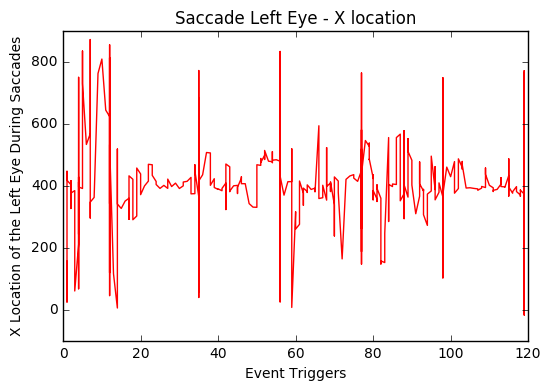

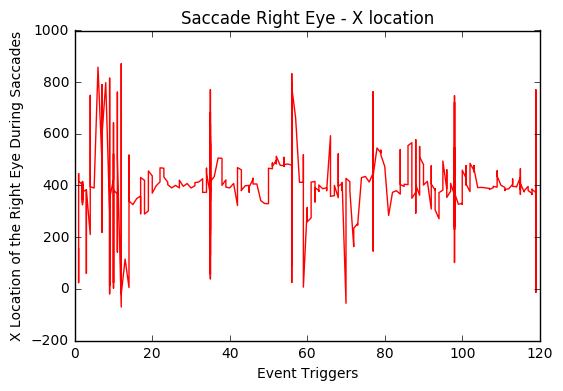

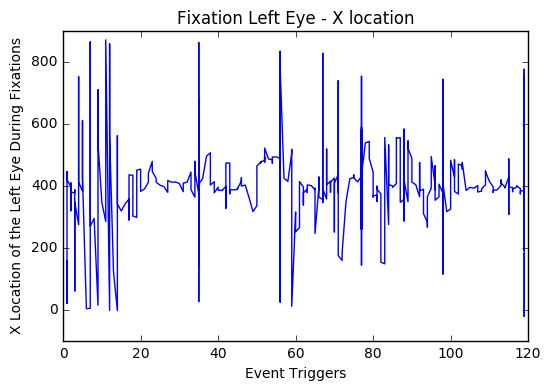

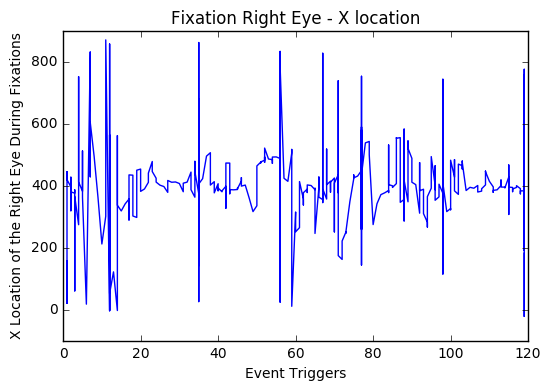

In [92]:
plt.plot(SLlabels, SL[:,7],'r')
plt.xlabel('Event Triggers')
plt.title("Saccade Left Eye - X location")
plt.ylabel('X Location of the Left Eye During Saccades')
plt.show()
plt.plot(SRlabels, SR[:,7],'r')
plt.xlabel('Event Triggers')
plt.title("Saccade Right Eye - X location")
plt.ylabel('X Location of the Right Eye During Saccades')
plt.show()
plt.plot(FLlabels, FL[:,7],'b')
plt.xlabel('Event Triggers')
plt.title("Fixation Left Eye - X location")
plt.ylabel('X Location of the Left Eye During Fixations')
plt.show()
plt.plot(FRlabels, FR[:,7],'b')
plt.xlabel('Event Triggers')
plt.title("Fixation Right Eye - X location")
plt.ylabel('X Location of the Right Eye During Fixations')
plt.show()

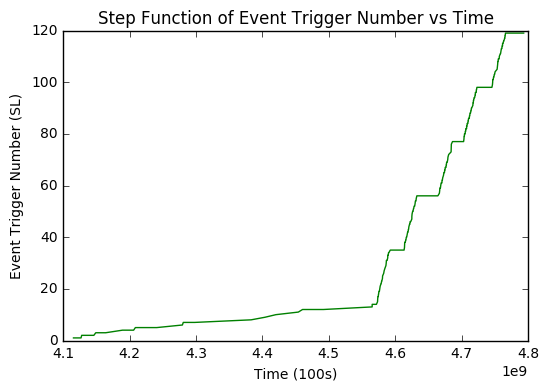

In [91]:
plt.plot(SL[:,4], SLlabels, 'g')
plt.ylabel("Event Trigger Number (SL)")
plt.xlabel("Time (100s)")
plt.title("Step Function of Event Trigger Number vs Time")
plt.show()

## Distance Function for Saccade 

- Return 2 values. Calculates how far the subject has moved in each the x-direction, and the y-direction between two time points in a Saccade.

In [7]:
def distance(saccade):
    tp = len(saccade[:,0])
    xdist = np.full(tp,0, dtype=float)
    ydist = np.full(tp,0, dtype=float)
    for i in range(tp):
        xdist[i] = float(saccade[i][8]) - float(saccade[i][6])
        ydist[i] = float(saccade[i][9]) - float(saccade[i][7])
    return saccade, xdist, ydist
distance(SL)

(array([['Saccade', 'L', '1', ..., '9765.67', '-9789.11', '6551.61'],
        ['Saccade', 'L', '1', ..., '9717.58', '-7210.95', '7188.55'],
        ['Saccade', 'L', '1', ..., '-1666.88', '-11824.74', '5837.74'],
        ..., 
        ['Saccade', 'L', '1', ..., '6199.66', '-7717.47', '4833.03'],
        ['Saccade', 'L', '1', ..., '190.83', '-569.14', '267.79'],
        ['Saccade', 'L', '1', ..., '7480.84', '-20404.43', '11532.17']], 
       dtype='|S11'),
 array([-16313.75, -49550.94, -16371.99, ..., -65997.53, -16136.21,
        -16577.93]),
 array([-139.97,  231.34,  168.77, ...,   11.08,   -6.07, -106.83]))

## Plots are Subsequently Generated

Saccade
L
1
1
4115581350
4115598097
16747
155.43


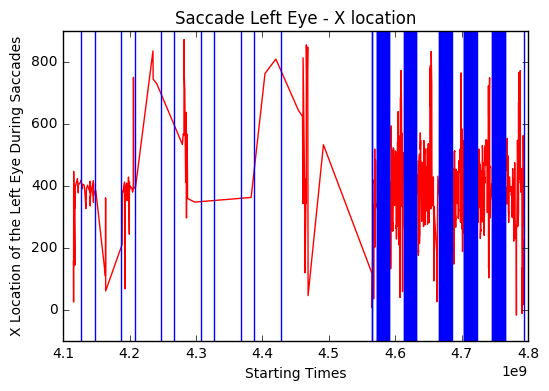

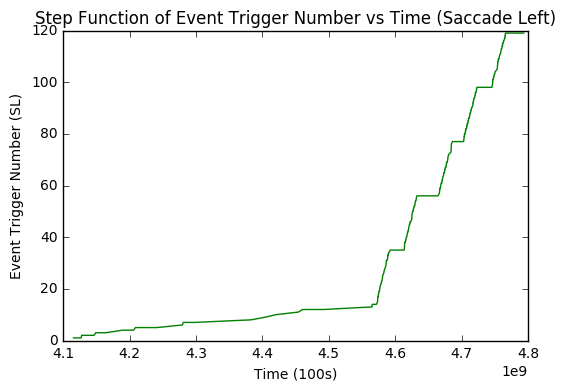

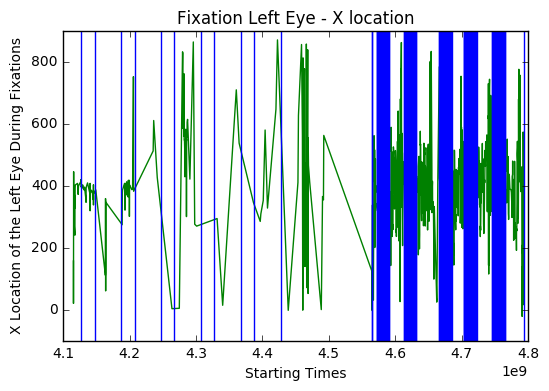

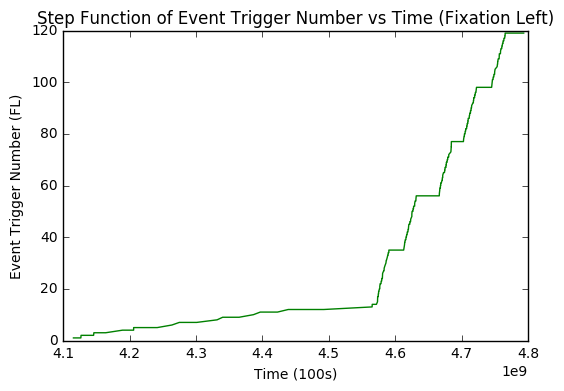

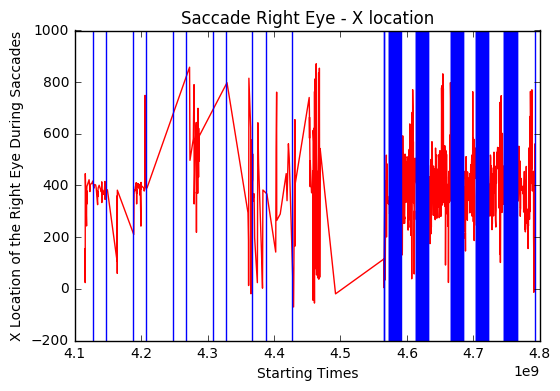

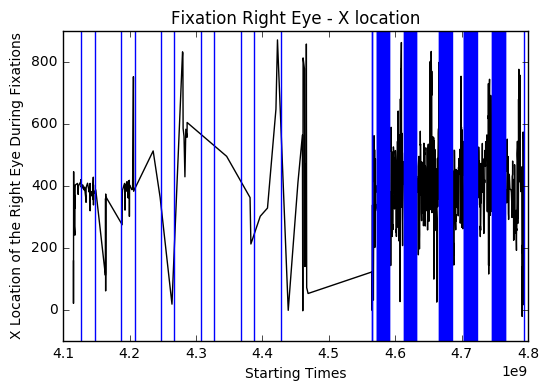

In [105]:
print SL[0][0]
print SL[0][1]
print SL[0][2]
print SL[0][3]
print SL[0][4]
print SL[0][5]
print SL[0][6]
print SL[0][7]

xcoords = Triggers
    
plt.plot(SL[:,4], SL[:,7],'r')
plt.title("Saccade Left Eye - X location")
plt.xlabel('Starting Times')
plt.ylabel('X Location of the Left Eye During Saccades')
for xc in xcoords:
    plt.axvline(x=xc)
plt.show()

plt.plot(SL[:,4], SLlabels, 'g')
plt.ylabel("Event Trigger Number (SL)")
plt.xlabel("Time (100s)")
plt.title("Step Function of Event Trigger Number vs Time (Saccade Left)")
plt.show()

plt.plot(FL[:,4], FL[:,7],'g')
plt.xlabel('Starting Times')
plt.title("Fixation Left Eye - X location")
plt.ylabel('X Location of the Left Eye During Fixations')
for xc in xcoords:
    plt.axvline(x=xc)
plt.show()

plt.plot(FL[:,4], FLlabels, 'g')
plt.ylabel("Event Trigger Number (FL)")
plt.xlabel("Time (100s)")
plt.title("Step Function of Event Trigger Number vs Time (Fixation Left)")
plt.show()

plt.plot(SR[:,4], SR[:,7],'r')
plt.xlabel('Starting Times')
plt.title("Saccade Right Eye - X location")
plt.ylabel('X Location of the Right Eye During Saccades')
for xc in xcoords:
    plt.axvline(x=xc)
plt.show()

plt.plot(FR[:,4], FR[:,7], 'k')
plt.xlabel('Starting Times')
plt.title("Fixation Right Eye - X location")
plt.ylabel('X Location of the Right Eye During Fixations')
for xc in xcoords:
    plt.axvline(x=xc)

    plt.show()

## Simulation

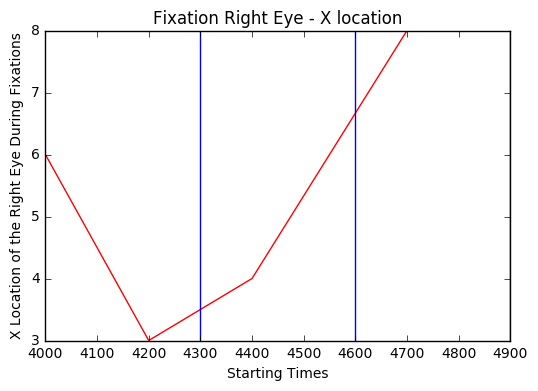

In [107]:
sim =  np.array([[6, 4000, 4200],
         [3, 4200, 4400],
         [4, 4400, 4700],
         [8, 4700, 5000]])
triggers = [4300, 4600, 4900]

def sepasim(data, triggers):
    numData = len(data[:,0])
    j = 0;
    c = 0;
    labels = []
    for i in range(numData):
        if float(data[i,2]) > float(triggers[j]) and j == 0:
            temp = np.full(c, j+1, dtype = int)
            j = j+1
            c = 0
            labels = np.concatenate((labels,temp))
        elif float(data[i,2]) > float(triggers[j]):
            temp = np.full(c, j+1, dtype = int)
            j = j+1
            c = 0
            labels = np.concatenate((labels,temp))
        elif i == numData - 1:
            temp = np.full(c+1, j+1, dtype = int)
            j = j+1
            c = 0
            labels = np.concatenate((labels,temp))
        c = c+1
    return labels

plt.plot(sim[:,1], sim[:,0], 'r')
plt.xlabel('Starting Times')
plt.title("Fixation Right Eye - X location")
plt.ylabel('X Location of the Right Eye During Fixations')
xcoords = triggers
for xc in xcoords:
    plt.axvline(x=xc)
plt.show()